In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
housing = pd.read_csv("~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/Ames_Housing_Price_Data.csv", index_col=0)
housing.head() #OPEN DATA FRAME
pd.set_option('display.max_columns', 500)
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [2]:
#Create seperate numeric-set
housing_numeric = housing[['PID','GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal']].copy()
housing_numeric['PID'] = housing_numeric['PID'].astype('str')
housing_numeric = housing_numeric.fillna(0)
housing_numeric

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
1,909176150,856,126000,0.0,7890,0.0,238.0,0.0,618.0,856.0,856,0,0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0
2,905476230,1049,139500,42.0,4235,149.0,552.0,393.0,104.0,1049.0,1049,0,0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0
3,911128020,1001,124900,60.0,6060,0.0,737.0,0.0,100.0,837.0,1001,0,0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0
4,535377150,1039,114000,80.0,8146,0.0,0.0,0.0,405.0,405.0,717,322,0,1,0,2,1,6,0,1.0,281.0,0,0,168,0,111,0,0
5,534177230,1665,227000,70.0,8400,0.0,643.0,0.0,167.0,810.0,810,855,0,2,1,3,1,6,0,2.0,528.0,0,45,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,0.0,8854,0.0,0.0,0.0,952.0,952.0,952,0,0,1,0,2,1,4,1,1.0,192.0,0,98,0,0,40,0,0
760,905402060,1733,139600,0.0,13680,0.0,0.0,0.0,0.0,0.0,1733,0,0,2,0,4,1,8,1,2.0,452.0,0,0,0,0,0,0,0
761,909275030,2002,145000,82.0,6270,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,2,0,4,2,8,0,3.0,871.0,0,0,0,0,0,0,0
762,907192040,1842,217500,0.0,8826,144.0,841.0,0.0,144.0,985.0,985,857,0,2,1,3,1,7,1,2.0,486.0,193,96,0,0,0,0,0


In [3]:
#Create seperate factor-set
housing_factor = housing.drop(['GrLivArea','SalePrice','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                         '2ndFlrSF','LowQualFinSF','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',  'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis=1)
housing_factor['PavedDrive'] = housing_factor.PavedDrive.apply(lambda Paved: 1 if Paved != "N" else 0)
housing_factor['CentralAir'] = housing_factor.CentralAir.apply(lambda Central: 1 if Central != "N" else 0) #Convert Y/N to Booleon 
housing_factor[['PID','MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath']] = housing_factor[['PID','MSSubClass','OverallQual','OverallCond','BsmtFullBath', 'BsmtHalfBath']].astype(str)
housing_factor['YrSold'] = pd.to_datetime(housing_factor['YrSold']).dt.strftime('%Y')
housing_factor['GarageYrBlt'] = pd.to_datetime(housing_factor['GarageYrBlt']).dt.strftime('%Y')
housing_factor['YearBuilt'] = pd.to_datetime(housing_factor['YearBuilt']).dt.strftime('%Y')
housing_factor['YearRemodAdd'] = pd.to_datetime(housing_factor['YearRemodAdd']).dt.strftime('%Y')
housing_factor['MoSold'] = pd.to_datetime(housing_factor['MoSold'],format='%m').dt.strftime('%m')
housing_factor[['PavedDrive','CentralAir']] = housing_factor[['PavedDrive','CentralAir']].astype('bool')
housing_factor #transform all integers into categorical variables
housing_factor.dtypes[housing_factor.dtypes == 'int64']
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
1,909176150,30,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,True,SBrkr,1.0,0.0,TA,Typ,Gd,Detchd,1970,Unf,TA,TA,True,NaN,NaN,NaN,03,1970,WD,Normal
2,905476230,120,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,True,SBrkr,1.0,0.0,Gd,Typ,NaN,Attchd,1970,Fin,TA,TA,True,NaN,NaN,NaN,02,1970,WD,Normal
3,911128020,30,C (all),Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1970,1970,Hip,CompShg,MetalSd,MetalSd,NaN,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,True,SBrkr,0.0,0.0,Gd,Typ,NaN,Detchd,1970,Unf,TA,Po,False,NaN,NaN,NaN,11,1970,WD,Normal
4,535377150,70,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1970,1970,Gable,CompShg,MetalSd,MetalSd,NaN,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,True,SBrkr,0.0,0.0,TA,Typ,NaN,Detchd,1970,Unf,TA,TA,False,NaN,NaN,NaN,05,1970,WD,Normal
5,534177230,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,1970,1970,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,NaN,Attchd,1970,Fin,TA,TA,True,NaN,NaN,NaN,11,1970,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,False,FuseF,0.0,0.0,Fa,Typ,Gd,Detchd,1970,Unf,Fa,Po,True,NaN,NaN,NaN,05,1970,WD,Normal
760,905402060,20,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1970,1970,Hip,CompShg,BrkFace,Wd Sdng,NaN,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,Ex,True,FuseA,0.0,0.0,TA,Min2,Gd,Attchd,1970,Unf,TA,TA,True,NaN,NaN,NaN,06,1970,WD,Normal
761,909275030,90,RH,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1970,1970,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,False,FuseA,0.0,0.0,TA,Typ,NaN,2Types,1970,Unf,TA,TA,True,NaN,NaN,NaN,08,1970,WD,Normal
762,907192040,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1970,1970,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,1970,Fin,TA,TA,True,NaN,NaN,NaN,07,1970,WD,Normal


In [4]:
#Get rid of all NAs
housing_factor['MiscFeature'] = housing_factor['MiscFeature'].fillna('NoFeature')
housing_factor['PoolQC'] = housing_factor['PoolQC'].fillna('NoPool')
housing_factor['Fence'] = housing_factor['Fence'].fillna('NoFence')
housing_factor['GarageQual'] = housing_factor['GarageQual'].fillna('NoGarage')
housing_factor['GarageCond'] = housing_factor['GarageCond'].fillna('NoGarage')
housing_factor['GarageFinish'] = housing_factor['GarageFinish'].fillna('NoGarage')
housing_factor['GarageYrBlt'] = housing_factor['GarageYrBlt'].fillna('1970') #903426160 and 910201180 do have a garage built, but an NA for all others, filled with mode
housing_factor['GarageType'] = housing_factor['GarageType'].fillna('NoGarage')
housing_factor['FireplaceQu'] = housing_factor['FireplaceQu'].fillna('NoFireplace')
housing_factor['BsmtFinType2'] = housing_factor['BsmtFinType2'].fillna('NoBsmt') #528142130 has a basement, but NA for values
housing_factor['BsmtFinType1'] = housing_factor['BsmtFinType1'].fillna('NoBsmt')
housing_factor['BsmtExposure'] = housing_factor['BsmtExposure'].fillna('NoBsmt')
housing_factor['BsmtCond'] = housing_factor['BsmtCond'].fillna('NoBsmt')
housing_factor['BsmtQual'] = housing_factor['BsmtQual'].fillna('NoBsmt') #916386080 is missing an electrical value  veneer
housing_factor['MasVnrType'] = housing_factor['MasVnrType'].fillna('NoVeneer')
housing_factor['Alley'] = housing_factor['Alley'].fillna('NoAlley')

housing_factor.to_pickle('housing_factor.pkl')
housing_factor

,PID,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
1,909176150,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,True,SBrkr,1.0,0.0,TA,Typ,Gd,Detchd,1970,Unf,TA,TA,True,NoPool,NoFence,NoFeature,03,1970,WD,Normal
2,905476230,120,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,True,SBrkr,1.0,0.0,Gd,Typ,NoFireplace,Attchd,1970,Fin,TA,TA,True,NoPool,NoFence,NoFeature,02,1970,WD,Normal
3,911128020,30,C (all),Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1970,1970,Hip,CompShg,MetalSd,MetalSd,NoVeneer,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,True,SBrkr,0.0,0.0,Gd,Typ,NoFireplace,Detchd,1970,Unf,TA,Po,False,NoPool,NoFence,NoFeature,11,1970,WD,Normal
4,535377150,70,RL,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1970,1970,Gable,CompShg,MetalSd,MetalSd,NoVeneer,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,True,SBrkr,0.0,0.0,TA,Typ,NoFireplace,Detchd,1970,Unf,TA,TA,False,NoPool,NoFence,NoFeature,05,1970,WD,Normal
5,534177230,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,1970,1970,Gable,CompShg,VinylSd,VinylSd,NoVeneer,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,NoFireplace,Attchd,1970,Fin,TA,TA,True,NoPool,NoFence,NoFeature,11,1970,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,30,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,NoVeneer,TA,TA,BrkTil,TA,TA,No,Unf,Unf,Grav,Fa,False,FuseF,0.0,0.0,Fa,Typ,Gd,Detchd,1970,Unf,Fa,Po,True,NoPool,NoFence,NoFeature,05,1970,WD,Normal
760,905402060,20,RL,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1970,1970,Hip,CompShg,BrkFace,Wd Sdng,NoVeneer,TA,TA,Slab,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NoBsmt,GasA,Ex,True,FuseA,0.0,0.0,TA,Min2,Gd,Attchd,1970,Unf,TA,TA,True,NoPool,NoFence,NoFeature,06,1970,WD,Normal
761,909275030,90,RH,Pave,NoAlley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1970,1970,Gable,CompShg,MetalSd,MetalSd,NoVeneer,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,False,FuseA,0.0,0.0,TA,Typ,NoFireplace,2Types,1970,Unf,TA,TA,True,NoPool,NoFence,NoFeature,08,1970,WD,Normal
762,907192040,60,RL,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1970,1970,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,True,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,1970,Fin,TA,TA,True,NoPool,NoFence,NoFeature,07,1970,WD,Normal


In [5]:
from sklearn.preprocessing import LabelEncoder
SalePrice = housing['SalePrice'] #This is the target
years = housing_factor[["YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd']].copy()
housing_factor_dummified1 = housing_factor.drop(['PID', "YrSold",'GarageYrBlt','MoSold','YearBuilt', 'YearRemodAdd'], axis=1)
label_encoder = LabelEncoder()
#housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']] = label_encoder.fit_transform(housing_factor_dummified1[['MSZoning','Street','Alley',
#'LotShape','LandContour',
#'Utilities','LotConfig','LandSlope','Neighborhood',
#'Condition1','Condition2','BldgType','HouseStyle',
#'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
#'MasVnrType','ExterQual','ExterCond','Foundation',
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#'BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual',
#'Functional','FireplaceQu','GarageType','GarageFinish',
#'GarageQual','GarageCond','PoolQC','Fence','MiscFeature',
#'SaleType','SaleCondition']])

housing_factor_dummified1= housing_factor_dummified1.apply(label_encoder.fit_transform)

housing_factor_dummified1 = pd.get_dummies(housing_factor_dummified1, drop_first = True)
housing_factor_dummified1

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,6,5,1,1,3,3,0,0,0,21,2,2,0,2,6,5,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,3,1,0,4,6,2,5,3,5,5,1,3,4,1,9,4
2,0,5,1,1,3,3,0,4,0,7,2,2,4,2,5,4,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
3,6,1,1,1,3,3,0,4,0,11,2,2,0,2,5,8,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,3,0,0,2,6,3,5,3,5,4,0,3,4,1,9,4
4,11,5,1,1,3,3,0,0,0,20,2,2,0,5,4,7,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,3,0,0,4,6,3,5,3,5,5,0,3,4,1,9,4
5,10,5,1,1,3,3,0,4,0,17,2,2,0,5,8,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,6,5,1,1,3,3,0,4,0,3,2,2,0,1,6,5,1,0,13,14,2,3,4,0,5,5,3,6,6,3,1,0,1,0,0,1,6,2,5,3,1,4,1,3,4,1,9,4
760,5,5,1,1,0,3,0,1,0,7,2,2,0,2,3,4,3,0,3,14,2,3,4,3,3,3,4,4,4,1,0,1,0,0,0,4,3,2,1,3,5,5,1,3,4,1,9,4
761,15,4,1,1,3,1,0,4,0,6,2,2,2,5,5,5,1,0,8,8,2,3,4,1,5,5,3,1,6,1,4,0,0,0,0,4,6,3,0,3,5,5,1,3,4,1,9,4
762,10,5,1,1,3,3,0,4,0,5,2,2,0,5,7,4,1,0,12,13,1,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,5,1,0,5,5,1,3,4,1,9,4


In [6]:
pd.set_option('display.max_rows', 500)
housing_numeric = pd.concat([housing_numeric, years], axis=1)
housing_numeric.to_pickle('housing_numeric.pkl')
housing_numeric.to_csv('~/Documents/NYCDSA/Third Project/ML_Ames_Housing/data/housing_numeric.csv')
housing_factor_dummified1 = pd.concat([housing_numeric, housing_factor_dummified1], axis=1)
#housing_factor_dummified1 = pd.concat([housing_factor_dummified1,housing_factor[["YrSold",'GarageYrBlt','MoSold','PavedDrive','YearBuilt', 'YearRemodAdd', 'CentralAir']]], axis = 1)
housing_factor_dummified1

,PID,GrLivArea,SalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,GarageYrBlt,MoSold,YearBuilt,YearRemodAdd,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1,909176150,856,126000,0.0,7890,0.0,238.0,0.0,618.0,856.0,856,0,0,1,0,2,1,4,1,2.0,399.0,0,0,0,0,166,0,0,1970,1970,03,1970,1970,6,5,1,1,3,3,0,0,0,21,2,2,0,2,6,5,1,0,13,14,2,3,4,1,5,5,3,5,6,1,4,1,3,1,0,4,6,2,5,3,5,5,1,3,4,1,9,4
2,905476230,1049,139500,42.0,4235,149.0,552.0,393.0,104.0,1049.0,1049,0,0,2,0,2,1,5,0,1.0,266.0,0,105,0,0,0,0,0,1970,1970,02,1970,1970,0,5,1,1,3,3,0,4,0,7,2,2,4,2,5,4,1,0,6,6,1,2,4,1,2,5,2,2,0,1,4,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
3,911128020,1001,124900,60.0,6060,0.0,737.0,0.0,100.0,837.0,1001,0,0,1,0,2,1,5,0,1.0,216.0,154,0,42,86,0,0,0,1970,1970,11,1970,1970,6,1,1,1,3,3,0,4,0,11,2,2,0,2,5,8,3,0,8,8,2,2,4,0,5,5,3,0,6,1,0,1,3,0,0,2,6,3,5,3,5,4,0,3,4,1,9,4
4,535377150,1039,114000,80.0,8146,0.0,0.0,0.0,405.0,405.0,717,322,0,1,0,2,1,6,0,1.0,281.0,0,0,168,0,111,0,0,1970,1970,05,1970,1970,11,5,1,1,3,3,0,0,0,20,2,2,0,5,4,7,1,0,8,8,2,2,2,0,1,5,3,6,6,1,2,1,3,0,0,4,6,3,5,3,5,5,0,3,4,1,9,4
5,534177230,1665,227000,70.0,8400,0.0,643.0,0.0,167.0,810.0,810,855,0,2,1,3,1,6,0,2.0,528.0,0,45,0,0,0,0,0,1970,1970,11,1970,1970,10,5,1,1,3,3,0,4,0,17,2,2,0,5,8,5,1,0,12,13,2,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,3,1,0,5,5,1,3,4,1,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,0.0,8854,0.0,0.0,0.0,952.0,952.0,952,0,0,1,0,2,1,4,1,1.0,192.0,0,98,0,0,40,0,0,1970,1970,05,1970,1970,6,5,1,1,3,3,0,4,0,3,2,2,0,1,6,5,1,0,13,14,2,3,4,0,5,5,3,6,6,3,1,0,1,0,0,1,6,2,5,3,1,4,1,3,4,1,9,4
760,905402060,1733,139600,0.0,13680,0.0,0.0,0.0,0.0,0.0,1733,0,0,2,0,4,1,8,1,2.0,452.0,0,0,0,0,0,0,0,1970,1970,06,1970,1970,5,5,1,1,0,3,0,1,0,7,2,2,0,2,3,4,3,0,3,14,2,3,4,3,3,3,4,4,4,1,0,1,0,0,0,4,3,2,1,3,5,5,1,3,4,1,9,4
761,909275030,2002,145000,82.0,6270,0.0,284.0,0.0,717.0,1001.0,1001,1001,0,2,0,4,2,8,0,3.0,871.0,0,0,0,0,0,0,0,1970,1970,08,1970,1970,15,4,1,1,3,1,0,4,0,6,2,2,2,5,5,5,1,0,8,8,2,3,4,1,5,5,3,1,6,1,4,0,0,0,0,4,6,3,0,3,5,5,1,3,4,1,9,4
762,907192040,1842,217500,0.0,8826,144.0,841.0,0.0,144.0,985.0,985,857,0,2,1,3,1,7,1,2.0,486.0,193,96,0,0,0,0,0,1970,1970,07,1970,1970,10,5,1,1,3,3,0,4,0,5,2,2,0,5,7,4,1,0,12,13,1,2,4,2,2,5,3,2,6,1,0,1,3,1,0,2,6,5,1,0,5,5,1,3,4,1,9,4


In [7]:
from sklearn.linear_model import LinearRegression
housing_factor_dummified1 = housing_factor_dummified1.drop(['PID'], axis=1)
lm = LinearRegression()
lm.fit(housing_factor_dummified1, housing['SalePrice'])

LinearRegression()

(array([  2.,   1.,  10., 507., 801.,   6.,   1., 505., 737.,  10.]),
 array([-1.22236088e-09, -1.02154445e-09, -8.20728019e-10, -6.19911589e-10,
        -4.19095159e-10, -2.18278728e-10, -1.74622983e-11,  1.83354132e-10,
         3.84170562e-10,  5.84986992e-10,  7.85803422e-10]),
 <BarContainer object of 10 artists>)

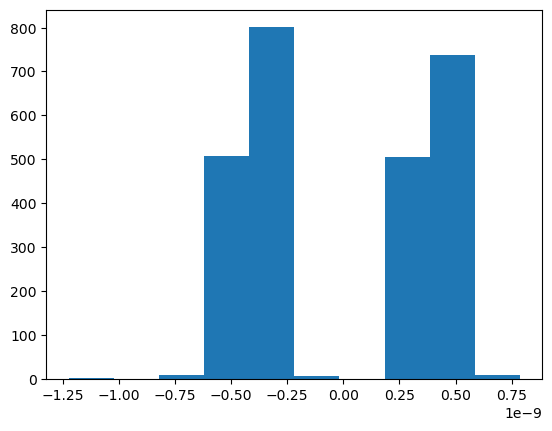

In [8]:
import matplotlib.pyplot as plt
residuals = SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [9]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 1.000
RSS is equal to 0.000
The intercept is 0.000
The slopes are [-2.11420883e-18 -5.69081916e-14  1.00000000e+00 -1.45853649e-13
  3.20779780e-16 -4.88169813e-14  6.31041890e-15 -1.82626634e-14
 -3.10688632e-16 -1.23062878e-14  1.26621440e-13  1.18964939e-13
 -3.10117362e-13 -1.96254287e-12 -5.78042040e-14  7.61780994e-13
  1.00096230e-12  7.95774396e-14  6.55481872e-13  2.11698698e-13
  9.56330356e-14 -2.89219301e-13 -2.81640940e-13  9.43330571e-14
  3.85946031e-13 -3.80136522e-13  1.16896262e-12  1.33068696e-15
  0.00000000e+00  0.00000000e+00  6.08522105e-13  0.00000000e+00
  0.00000000e+00]


In [10]:
print('negative slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ < 0]))
print('positive slope column names %s' %(housing_factor_dummified1.columns[lm.coef_ > 0]))

IndexError: boolean index did not match indexed array along dimension 0; dimension is 80 but corresponding boolean dimension is 33

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00, 1.000e+01,
        1.130e+02, 1.891e+03, 5.490e+02, 1.000e+01]),
 array([-1.28794271, -1.12146799, -0.95499327, -0.78851854, -0.62204382,
        -0.4555691 , -0.28909438, -0.12261966,  0.04385507,  0.21032979,
         0.37680451]),
 <BarContainer object of 10 artists>)

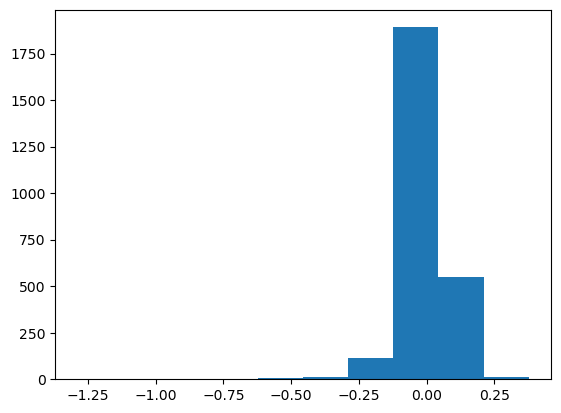

In [11]:
log_SalePrice = np.log(SalePrice) #Take log of DV
lm.fit(housing_factor_dummified1, log_SalePrice) #LM of log of DV
residuals = log_SalePrice - lm.predict(housing_factor_dummified1)
plt.hist(residuals)

In [12]:
print('R^2 is equal to %.3f' %(lm.score(housing_factor_dummified1,log_SalePrice))) #By default, score gives R^2. 
print('RSS is equal to %.3f' %(np.sum(residuals**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.958
RSS is equal to 16.165
The intercept is 10.371
The slopes are [ 2.85610733e-05  3.55765215e-06 -4.24132045e-05  4.78470888e-07
 -9.38330913e-05  3.40798594e-06  1.94961345e-05  1.04484425e-05
  3.33525630e-05  3.48696087e-05  7.74379986e-06 -1.40523353e-05
  2.85112057e-02  1.53904795e-02  6.74948367e-03 -1.65614805e-02
  2.75584936e-03  7.44446569e-03  2.07222639e-02 -2.46161857e-05
  1.74102082e-06  2.44844228e-05  5.83395264e-05  7.49401490e-05
  8.38300518e-05  4.88584407e-05  8.47924990e-07  1.14491749e-16
 -1.76291273e-16 -1.38272513e-04  1.17961196e-16  5.20417043e-17
  2.39550856e-03 -1.09400932e-02  5.94178649e-02  1.81388368e-02
 -2.21865017e-03  2.28592392e-03 -4.26272995e-02  1.85813387e-04
  1.10102335e-02 -4.96661963e-04  1.65752393e-03 -1.00878600e-02
  2.26610966e-03 -1.19117044e-04  3.23532306e-02  2.35306536e-02
 -3.53703193e-03 -4.07793829e-04  5.90938309e-06  2.29751007e-03
 -7.15886911e-03  1.26186571e-02  7.82972054e-03  1.09715552e-02
  1.61

In [13]:
scores = {}
for idx, name1 in enumerate(housing_factor_dummified1.columns):
        myColumns = housing_factor_dummified1.columns[(idx+1):]
        pass

In [14]:
from itertools import combinations 

scores = {}

combos = combinations(housing_factor_dummified1.columns, 3)

for c in combos:
    X = housing_factor_dummified1[list(c)]
    Y = log_SalePrice
    reg = LinearRegression().fit(X,Y)
    scores[c] = reg.score (X,Y)

In [15]:
sorted(scores.items(), key=lambda features_score: abs(features_score [1]), reverse = True)

[(('SalePrice', 'FullBath', 'GarageCars'), 0.9121776231637476),
 (('SalePrice', 'BedroomAbvGr', 'GarageCars'), 0.9112450372574613),
 (('SalePrice', 'MasVnrArea', 'GarageCars'), 0.9106339377747132),
 (('GrLivArea', 'SalePrice', 'GarageCars'), 0.9104774673572094),
 (('SalePrice', 'FullBath', 'GarageArea'), 0.9104044778276149),
 (('SalePrice', 'Fireplaces', 'GarageCars'), 0.9101456830950135),
 (('SalePrice', 'FullBath', 'Fireplaces'), 0.9099830049357067),
 (('SalePrice', 'MasVnrArea', 'FullBath'), 0.9097874152537018),
 (('SalePrice', 'HalfBath', 'GarageCars'), 0.9097698363899076),
 (('SalePrice', 'TotRmsAbvGrd', 'GarageCars'), 0.9096904161059416),
 (('SalePrice', 'FullBath', 'KitchenAbvGr'), 0.9095723905197203),
 (('SalePrice', 'FullBath', 'HalfBath'), 0.9095695162661293),
 (('SalePrice', '2ndFlrSF', 'GarageCars'), 0.9093154997432717),
 (('SalePrice', 'TotalBsmtSF', 'GarageCars'), 0.9092959239063992),
 (('SalePrice', 'TotalBsmtSF', 'FullBath'), 0.9091487746797318),
 (('SalePrice', 'LotFro

In [16]:
import statsmodels.api as sm
x = sm.add_constant(housing_factor_dummified1)
model = sm.OLS(log_SalePrice, x.astype(float))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1135.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:43:35   Log-Likelihood:                 2096.4
No. Observations:                2580   AIC:                            -4137.
Df Residuals:                    2552   BIC:                            -3973.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.153e-07   1.16e-09    615.104      0.000    7.13e-07    7.18e-07
PID           -2.202e-11   1.23e-11     -1.792      0.073   -4.61e-11    2.08e-12
GrLivArea     -2.641e-05    1.4e-05     -1.889      0.059   -5.38e-05    1.01e-06
SalePrice      4.107e-06   6.47e-08     63.438      0.000    3.98e-06    4.23e-06
LotFrontage      -0.0002    6.7e-05     -2.874      0.004      -0.000   -6.12e-05
LotArea       -4.247e-07   2.85e-07     -1.489      0.137   -9.84e-07    1.35e-07
MasVnrArea       -0.0001   1.43e-05     -9.334      0.000      -0.000      -0.000
BsmtFinSF1     1.576e-05   5.46e-06      2.890      0.004    5.07e-06    2.65e-05
BsmtFinSF2     2.584e-05    9.5e-06      2.721      0.007    7.22e-06    4.45e-05
BsmtUnfSF      3.873e-06   4.81e-06      0.805      0.421   -5.56e-06    1.33e-05
TotalBsmtSF    4.548e-05   7.36e-06      6.180      0.000     3.1e-05    5.99e-05
1stFlrSF         3.3e-05   1.47e-05      2.243      0.025    4.15e-06    6.19e-05
2ndFlrSF       1.846e-05   1.38e-05      1.341      0.180   -8.54e-06    4.55e-05
LowQualFinSF  -7.787e-05   3.67e-05     -2.119      0.034      -0.000   -5.82e-06
FullBath          0.0529      0.006      9.182      0.000       0.042       0.064
HalfBath          0.0342      0.006      5.747      0.000       0.023       0.046
BedroomAbvGr      0.0211      0.004      5.326      0.000       0.013       0.029
KitchenAbvGr     -0.0890      0.012     -7.249      0.000      -0.113      -0.065
TotRmsAbvGrd      0.0010      0.003      0.350      0.727      -0.005       0.007
Fireplaces        0.0223      0.004      5.491      0.000       0.014       0.030
GarageCars        0.0462      0.007      6.809      0.000       0.033       0.060
GarageArea    -1.594e-05   2.36e-05     -0.674      0.500   -6.23e-05    3.04e-05
WoodDeckSF     3.249e-05   1.82e-05      1.790      0.074   -3.11e-06    6.81e-05
OpenPorchSF    4.601e-05    3.5e-05      1.315      0.189   -2.26e-05       0.000
EnclosedPorch -8.059e-05    3.5e-05     -2.299      0.022      -0.000   -1.19e-05
3SsnPorch         0.0001   8.46e-05      1.747      0.081   -1.81e-05       0.000
ScreenPorch    4.675e-05   3.89e-05      1.202      0.229   -2.95e-05       0.000
PoolArea       3.087e-06   7.16e-05      0.043      0.966      -0.000       0.000
MiscVal        4.442e-06   4.29e-06      1.036      0.301   -3.97e-06    1.29e-05
YrSold            0.0014   2.29e-06    615.104      0.000       0.001       0.001
GarageYrBlt       0.0014   2.29e-06    615.104      0.000       0.001       0.001
MoSold        -8.998e-05      0.001     -0.112      0.911      -0.002       0.001
YearBuilt         0.0014   2.29e-06    615.104      0.000       0.001       0.001
YearRemodAdd      0.0014   2.29e-06    615.104      0.000       0.001       0.001
=================================================

In [17]:
pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < .05].sort_values()

The significant coefficients


const            0.000000e+00
GarageYrBlt      0.000000e+00
YrSold           0.000000e+00
YearBuilt        0.000000e+00
YearRemodAdd     0.000000e+00
SalePrice        0.000000e+00
MasVnrArea       2.136828e-20
FullBath         8.527195e-20
KitchenAbvGr     5.539955e-13
GarageCars       1.219507e-11
TotalBsmtSF      7.435416e-10
HalfBath         1.014622e-08
Fireplaces       4.392180e-08
BedroomAbvGr     1.092292e-07
BsmtFinSF1       3.888576e-03
LotFrontage      4.083782e-03
BsmtFinSF2       6.551753e-03
EnclosedPorch    2.155895e-02
1stFlrSF         2.500140e-02
LowQualFinSF     3.416715e-02
dtype: float64

In [18]:
print('The insignificant coefficients')
pValues[pValues > .05]

The insignificant coefficients


PID             0.073287
GrLivArea       0.059040
LotArea         0.136572
BsmtUnfSF       0.420879
2ndFlrSF        0.180068
TotRmsAbvGrd    0.726633
GarageArea      0.500096
WoodDeckSF      0.073611
OpenPorchSF     0.188585
3SsnPorch       0.080713
ScreenPorch     0.229352
PoolArea        0.965602
MiscVal         0.300529
MoSold          0.910890
dtype: float64